In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scaleops.scenario as sc
from IPython.display import display

from scaleops.promqlpandas import Prometheus
from scaleops.scenario import Scenario
from scaleops.scenariometrics import (NodeScenarioMetricsMixin)

# @formatter:off
%matplotlib inline
# @formatter:on

plt.style.use('seaborn-whitegrid')


class WorkingScenarioMetrics(NodeScenarioMetricsMixin):
    pass


a = Scenario(
        '',
        '',
        datetime.now() - timedelta(days=2),
        datetime.now() - timedelta(days=1),
        '1m'
)
b = Scenario(
        '',
        '',
        datetime.now() - timedelta(days=7),
        datetime.now() - timedelta(days=6),
        '1m'
)

p = Prometheus('http://demo.robustperception.io:9090/')
s = WorkingScenarioMetrics(p)

IndexError: positional indexers are out-of-bounds

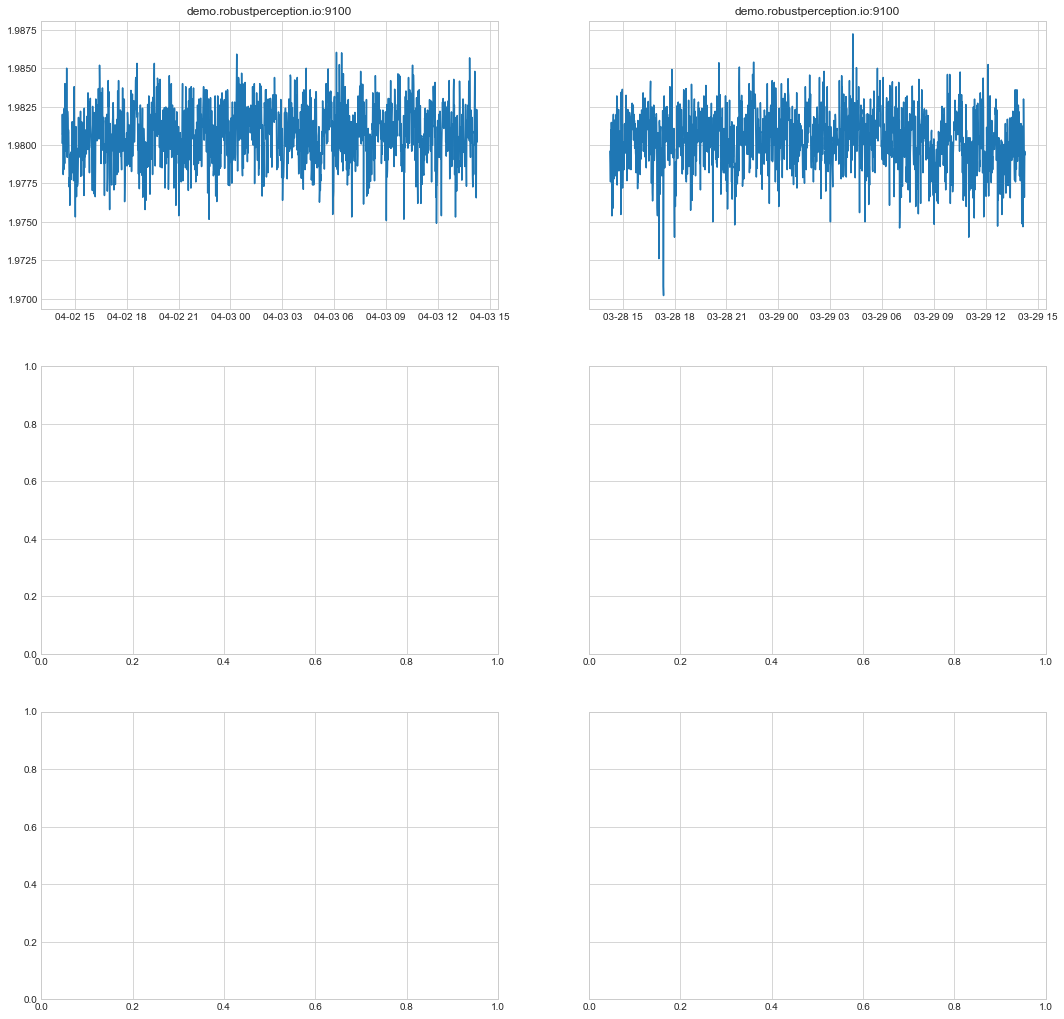

In [6]:
a_node_cpu_utilization = s.node_cpu_utilization(a)[0].metric.groupby('instance', axis=1).sum()
b_node_cpu_utilization = s.node_cpu_utilization(b)[0].metric.groupby('instance', axis=1).sum()
sc.plot_line_ab('node_cpu_utilization', 'percent', a_node_cpu_utilization, b_node_cpu_utilization)